In [3]:
import numpy as np

### `Q-1:` Find the nearest element in the array to a given integer.
```
Ex:-
a=23 and array - [10 17 24 31 38 45 52 59].
Nearest element is 24
```
Hint: Read about this function `argmin()`

In [4]:
# code here

### `Q-2:` Replace multiples of 3 or 5 as 0 in the given array.
```
arr=[1 2 3 4 5 6 7 9]

result-> [1 2 0 4 0 0 7 0]
```

In [7]:
# code here
arr = np.array([1,2,3,4,5,6,7,9])

mask1 = (arr % 3 == 0)
mask2 = (arr % 5 == 0)

mask = mask1 | mask2
arr[mask] = 0
arr

array([1, 2, 0, 4, 0, 0, 7, 0])

### `Q-3:` Use Fancy Indexing.
1. Double the array elements at  given indexes
```
arr = np.arange(10)
indexes = [0,3,4,9]
```
Result -> `[ 0  1  2  6  8  5  6  7  8 18]`

2. Using a given array make a different array as in below example
```
array = [1,2,3]
result array -> [1 1 1 2 2 2 3 3 3]
```
* Internal-repetion should be as length of the array.

Hint:
```
if a is an array
a = [2,4]
a[[1,1,0,1]] will result in-> [4 4 2 4]
```

In [11]:
# code here
arr = np.arange(10)
indexes = [0,3,4,9]

arr[indexes] = arr[indexes] * 2
arr

array([ 0,  1,  2,  6,  8,  5,  6,  7,  8, 18])

In [13]:
arr = np.array([1,2,3])
ans = np.ravel([[i] * arr.size for i in arr])
ans

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

### `Q-4:` You are given an array which is having some nan value. Your job is to fill those nan values with most common element in the array.
```
arr=np.array([[1,2,np.nan],[4,2,6],[np.nan,np.nan,5]])

```

In [27]:
# code here
from scipy import stats as st
arr=np.array([[1,2,np.nan],[4,2,6],[np.nan,np.nan,5]])
mask = ~np.isnan(arr)
mode = st.mode(arr[mask]).mode

np.nan_to_num(arr, nan=mode)

array([[1., 2., 2.],
       [4., 2., 6.],
       [2., 2., 5.]])

### `Q-5:` Write a NumPy program

- to find the missing data in a given array. Return a boolean matrix.
- also try to fill those missing values with 0. For that, you can use `np.nan_to_num(a)`

```python
import numpy as np

np.array([[3, 2, np.nan, 1],
          [10, 12, 10, 9],
          [5, np.nan, 1, np.nan]])
```

In [ ]:
# code here
np.nan_to_num(arr, nan = 0)

### `Q-6:` Given two arrays, X and Y, construct the Cauchy matrix C.
`Cij =1/(xi - yj)`

http://en.wikipedia.org/wiki/Cauchy_matrix
```
x = numpy.array([1,2,3,4]).reshape((-1, 1)
y = numpy.array([5,6,7])
```

In [31]:
# code here
def cauchy_matrix(x, y):
    return 1 / (x - y)

x = np.array([1,2,3,4]).reshape((-1, 1))
y = np.array([5,6,7])
cauchy_matrix(x, y)

array([[-0.25      , -0.2       , -0.16666667],
       [-0.33333333, -0.25      , -0.2       ],
       [-0.5       , -0.33333333, -0.25      ],
       [-1.        , -0.5       , -0.33333333]])

### `Q-7:` Plot this below equation.

$$\large y = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

**Note: This equation is called tanh activation function. In deep learning, many times this function is used. If you find some difference between the sigmoid function and this tanh function, note that to your notebook.**

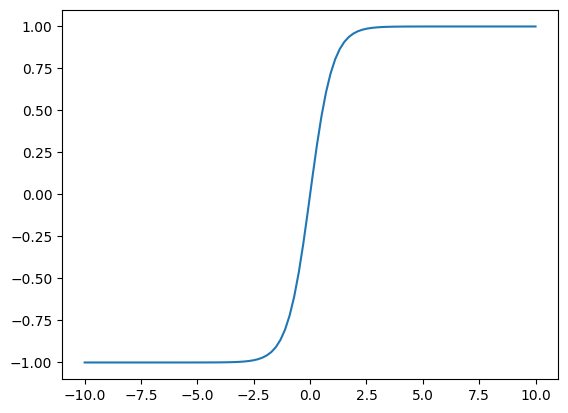

In [32]:
# code here
def tanh_activation(x):
    normal_e = np.exp(x)
    reciprocal_e = np.exp(-x)
    
    return (normal_e - reciprocal_e)/ (normal_e + reciprocal_e)

x = np.linspace(-10, 10, 100)
y = tanh_activation(x)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y)
plt.show()

### `Q-8:` Plot the below equation.

$$\large y = \sqrt{36 - (x - 4)^2} + 2$$

The range of x should be between -2 to 10. $x ∈ [-2, 10]$



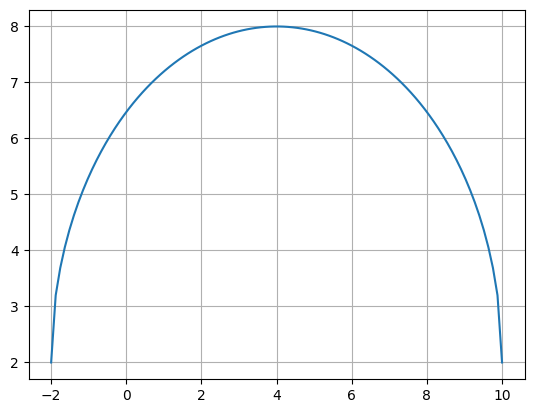

In [34]:
# code here

x = np.linspace(-2, 10, 100)
y = np.sqrt(36 - ((x - 4) ** 2)) + 2

plt.plot(x, y)
plt.grid()
plt.show()

### `Q-9:` Write a program to implement broadcasting rule to check if two array can be added or not.
Given tuples of shapes.
```
shape of a - (3,2,2)
shape of b - (2,2)

check_broadcast(a, b) -> return Boolean (True if can broadcasted, False otherwise.)
```

In [51]:
# code here
def check_broadcast(a, b):
    if a == b:
        return True
    if len(a) == len(b):
        # make 1's to non-1's
        for i in range(len(a)):
            if a[i] != b[i] and a[i] != 1 and b[i] != 1:
                return False
        return True
    else:
        # find the smaller tuple
        smaller = np.array(a) if len(a) < len(b) else np.array(b)
        bigger = np.array(a) if len(a) > len(b) else np.array(b)

        diff = np.abs(len(a) - len(b)) # how many 1's we need to prepend into smaller
        ones = np.tile(np.array([1]), diff) # [1,1,1,1,1,1,1, ....] diff times
        
        new_smaller = np.hstack((ones, smaller))

        return check_broadcast(tuple(new_smaller), tuple(bigger))

In [55]:
check_broadcast((2,3), (2,3,3,4))

False